In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/david/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%run pathtodata.py
file_path = os.path.join(pathtodata(), 'poloniex_usdt_pairs.csv')
pdf = pd.read_csv(file_path)

/Users/david/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import utils

from keras.utils import np_utils
from keras.layers.core import Dense, Activation
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM


Using TensorFlow backend.


In [3]:
#Let us get rid of second value of each coin which is just the product of price and q
list_t = []
for i in list(pdf):
    if '1' not in i:
        list_t.append(i)
new_pd = pdf.loc[:,list_t]

In [162]:
new_df = new_pd.iloc[20000:-3,:20].set_index('Unnamed: 0').apply(lambda x: pd.Series([float(i) for i in x]))

In [163]:
new_df

,USDT_BTC,USDT_BTC.2,USDT_XRP,USDT_XRP.2,USDT_BCH,USDT_BCH.2,USDT_ETH,USDT_ETH.2,USDT_LTC,USDT_LTC.2,USDT_ETC,USDT_ETC.2,USDT_STR,USDT_STR.2,USDT_XMR,USDT_XMR.2,USDT_ZEC,USDT_ZEC.2,USDT_DASH
0,0.719269,1179.704693,1003.000000,0.006207,NaN,NaN,47.102253,19.582491,0.000000,3.835000,0.000000,1.329987,0.000000,0.001769,0.272635,13.520590,0.000000,36.278042,23.076104
1,1.629159,1178.208247,6939.609163,0.006091,NaN,NaN,43.755583,19.498407,198.632604,3.820000,0.000132,1.329973,0.000000,0.001769,17.570132,13.401277,1.309121,36.590916,20.390281
2,14.879332,1182.392245,23411.848673,0.006084,NaN,NaN,188.040862,19.606098,0.000000,3.820000,691.282650,1.329953,0.000000,0.001769,302.785590,13.520590,0.330504,36.500000,81.780509
3,19.474713,1182.222090,29112.735711,0.006195,NaN,NaN,16.940611,19.555424,23.752890,3.835000,0.000000,1.320005,0.000000,0.001769,462.314432,13.520590,47.935204,36.795859,132.497969
4,10.412493,1183.108319,0.281994,0.006194,NaN,NaN,75.979044,19.624007,4.565709,3.834713,0.000000,1.320005,0.000000,0.001769,85.101301,13.520590,128.844868,36.799337,34.320249
5,169.526478,1177.738014,7317.093637,0.006142,NaN,NaN,198.970643,19.465639,0.000000,3.835000,0.000000,1.320005,0.000000,0.001769,13.258105,13.520590,3.427156,36.751061,114.714474
6,16.748266,1185.182539,0.000000,0.006142,NaN,NaN,6.117157,19.468697,0.000000,3.835000,0.000000,1.320005,0.000000,0.001769,0.000000,13.520590,0.639843,36.765453,23.753722
7,6.375642,1186.081363,140854.522654,0.006142,NaN,NaN,31.826645,19.580881,30.082790,3.849900,157.202818,1.329564,0.000000,0.001769,45.540014,13.520587,4.536184,36.779853,23.682225
8,3.248101,1185.703464,70497.026910,0.006142,NaN,NaN,3.957347,19.521704,0.000000,3.849900,0.000000,1.329927,0.000000,0.001769,25.953000,13.453653,1.547444,36.510013,34.222099
9,27.853879,1186.360392,8705.308290,0.006142,NaN,NaN,332.183088,19.639738,0.037657,3.849719,0.000000,1.329927,0.000000,0.001769,0.015387,13.452987,0.101685,36.510015,16.046808


In [5]:
growth_binary_arr = [0]
for i in range(len(new_df['USDT_BTC.2'])):
    if i == 0:
        continue
    diff = new_df['USDT_BTC.2'][i] - new_df['USDT_BTC.2'][i-1]
    bin_res = 1 if diff > 0 else 0
    growth_binary_arr.append(bin_res)
new_df['new'] = growth_binary_arr

In [158]:
new_one = new_df.iloc[70000:,:]

In [18]:
def growth(col):    
    col_g = np.exp(np.diff(np.log(col))) -1
    #print(col)
    print(col_g)
    return col_g

In [26]:
hip = new_df.iloc[75000:,:-1].apply(lambda x: pd.Series(growth(np.array(x))))

[-0.49029339 -0.58011983  1.10805135 ..., -0.45672948 -0.78545802
  5.82511506]
[-0.49029339 -0.58011983  1.10805135 ..., -0.45672948 -0.78545802
  5.82511506]
[ 0.00134676 -0.00119457 -0.00260409 ...,  0.00058706 -0.00259372
  0.00115531]
[   0.43272956   -0.94693697  106.65561013 ...,   -0.94039244   12.15397964
   -0.68396228]
[ 0.00596118 -0.00606986  0.00217564 ...,  0.00122453 -0.00122044
  0.00025369]
[  0.10522919  -0.79507828   5.70730981 ...,  13.05375116  -0.99810151
   0.32225992]
[  9.99677534e-04  -4.77728377e-03  -6.37969381e-03 ...,   0.00000000e+00
   2.79008662e-03  -6.26391171e-05]
[-0.81449337  0.0378043   3.45690248 ...,  6.61869521  1.31373829
 -0.97221893]
[  5.23167486e-03  -1.13422728e-03  -4.75001650e-03 ...,   1.56158355e-03
   2.25963328e-04  -5.20508443e-05]
[ -0.60894419  -0.23319867   0.50114068 ...,  -0.50272112  11.02971787
   0.55113977]
[-0.00048934 -0.00125017 -0.00357703 ..., -0.00028066 -0.00331689
  0.0042374 ]
[-0.54558943  0.48663055  1.42198488

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/david/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:1768: RuntimeWarning: invalid value encountered in subtract
  return a[slice1]-a[slice2]


In [36]:
hip.iloc[:,0:3]

,USDT_BTC,USDT_BTC.2,USDT_XRP
0,-0.490293,0.001347,0.432730
1,-0.580120,-0.001195,-0.946937
2,1.108051,-0.002604,106.655610
3,0.876836,-0.003295,-0.945395
4,0.097471,-0.004287,27.092068
5,-0.492251,0.004371,-0.534399
6,1.362156,-0.000100,-0.328391
7,-0.346308,0.003605,1.900393
8,-0.162437,0.004413,-0.485482
9,-0.146050,-0.001501,-0.793850


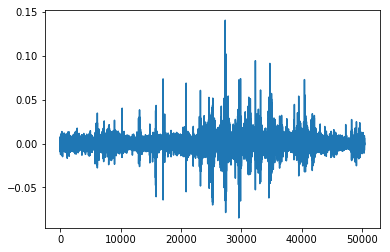

In [37]:
plt.plot(hip.iloc[:,3])

In [30]:
hip = hip.iloc[:,:10]
growth_binary_arr = [0]
for i in range(len(hip['USDT_BTC.2'])):
    if i == 0:
        continue
    diff = hip['USDT_BTC.2'][i] - hip['USDT_BTC.2'][i-1]
    bin_res = 1 if diff > 0 else 0
    growth_binary_arr.append(bin_res)
new_df['new'] = growth_binary_arr

In [31]:
"""
incremental_index = []
for i in range(len(hipso)):
    if growth_binary_arr[i] == 0:
        incremental_index.append(0)
        continue
    else:
        t = 1
        for y in hipso[i+1:]:
            if growth_binary_arr[y] == 1:
                t += 1
            else:
                incremental_index.append(t)
                break
"""

'\nincremental_index = []\nfor i in range(len(hipso)):\n    if growth_binary_arr[i] == 0:\n        incremental_index.append(0)\n        continue\n    else:\n        t = 1\n        for y in hipso[i+1:]:\n            if growth_binary_arr[y] == 1:\n                t += 1\n            else:\n                incremental_index.append(t)\n                break\n'

In [ ]:
new_df['guess'] = hip_new
new_df = new_df.fillna(0)

In [ ]:
"""
df_growth = pd.DataFrame()
add = np.array(pdf.columns)[1:-2]
from numpy import inf, nan
for i in add:
    bitcoin_price = np.array(new_df[i])[:-2]
    diff_bit_price = np.diff(bitcoin_price)/bitcoin_price[:-1]
    append_diff = np.append(diff_bit_price[0], diff_bit_price)
    #series = pd.Series(append_diff).apply(lambda x: 1 if x > 0 else 0)
    append_diff[append_diff == inf] = 0
    append_diff[np.isnan(append_diff)] = 0
    df_growth[i +'gd'] = append_diff
"""

In [88]:
hip = hip.replace(np.inf, 0).astype('float32').replace(np.nan, 0)
hip.shape

(50387, 10)

In [89]:
scaler_x=MinMaxScaler(feature_range=(-1,1))
x_set=scaler_x.fit_transform(hip)
scaler_y=MinMaxScaler(feature_range=(-1,1))


In [140]:
#LSTM requires 3D data
train = hip.iloc[48087:50187,:7]
test = hip.iloc[50187:,:7]

scaler_x=MinMaxScaler(feature_range=(-1,1))
scaler_y=MinMaxScaler(feature_range=(-1,1))


train_X, train_y = scaler_x.fit_transform(np.array(train.iloc[:, 2:])), scaler_y.fit_transform(np.array(train.iloc[:, 1]))
test_X, test_y = scaler_x.fit_transform(np.array(test.iloc[:, 2:])), scaler_y.fit_transform(np.array(test.iloc[:, 1]))


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2100, 1, 5) (2100,) (200, 1, 5) (200,)


/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

In [141]:
train_X[:,0,1]


array([-0.05821874,  0.08697292,  0.08953479, ...,  0.09465092,
        0.0761008 , -0.0024911 ], dtype=float32)

In [142]:
model = Sequential()
model.add(LSTM (  128, activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(train_X.shape[1],train_X.shape[2]) ))#(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
model.fit(train_X, train_y, epochs=4, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

/Users/david/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, activation="tanh", input_shape=(1, 5), recurrent_activation="hard_sigmoid")`
  


Train on 2100 samples, validate on 200 samples
Epoch 1/4
 - 3s - loss: 0.1328 - val_loss: 0.2651
Epoch 2/4
 - 0s - loss: 0.0981 - val_loss: 0.2841
Epoch 3/4
 - 0s - loss: 0.0927 - val_loss: 0.2959
Epoch 4/4
 - 0s - loss: 0.0925 - val_loss: 0.2921


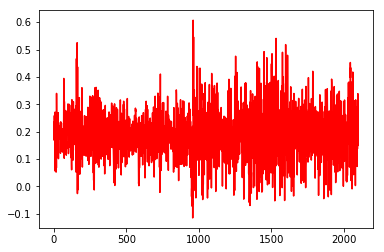

In [143]:
trainpredict=model.predict(train_X)
testpredict=model.predict(test_X)
plt.plot(trainpredict, color='red')
#plt.plot(train_y,color='blue')

In [144]:
trainpredict=scaler_y.inverse_transform(np.array(trainpredict))
testpredict=scaler_y.inverse_transform(np.array(testpredict))

y_test=scaler_y.inverse_transform(np.array(test_y))
y_train=scaler_y.inverse_transform(np.array(train_y))

/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


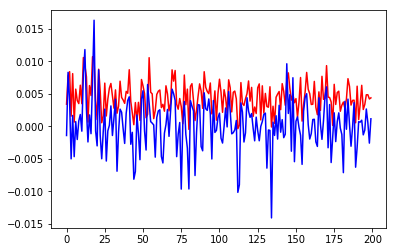

In [147]:
plt.plot(testpredict, color='red')
plt.plot(y_test,color='blue')

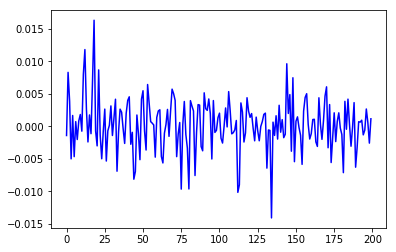

In [146]:
plt.plot(y_test,color='blue')

In [159]:
scalx = MinMaxScaler(feature_range=(-1,1))
xx = scalx.fit_transform(new_one.iloc[:,3:8])

scaly = MinMaxScaler(feature_range=(-1,1))
yy = scaly.fit_transform(new_one.iloc[:,1])

/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/david/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
